True

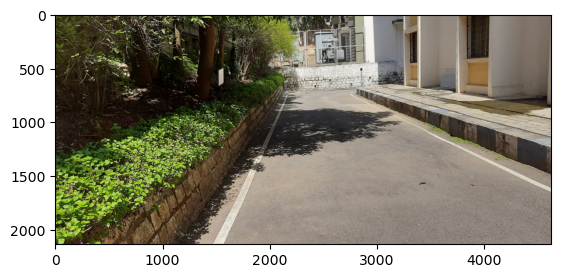

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('ShadowRemoval1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# convert the input image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply thresholding to convert grayscale to binary image
ret,thresh = cv2.threshold(gray,70,255,0)
im = cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB)
im2 = 255 - im
cv2.imwrite('cb.jpg',im2)

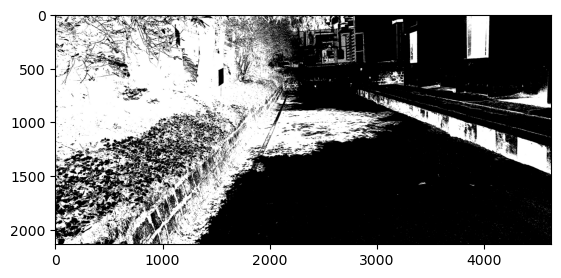

In [5]:
bimg = cv2.imread('cb.jpg')
plt.imshow(bimg)

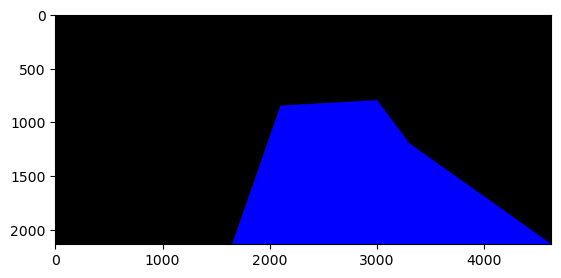

In [6]:
height = bimg.shape[0]
width = bimg.shape[1]
polygon = np.array([[(2100, 850),(1650, height),(3700,height), (width,height),(3300,1200),(3000,800)]])
mask = np.zeros_like(img)
mask = cv2.fillPoly(mask,polygon,255)
mask2 = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
plt.imshow(mask2)

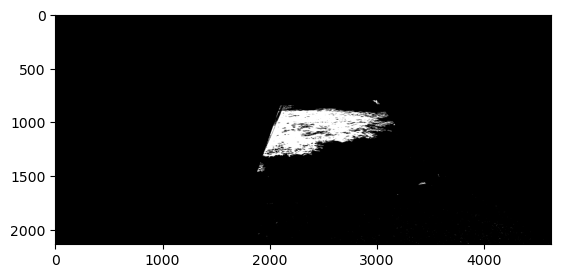

In [7]:
masked_image = cv2.bitwise_and(bimg,mask)
masked_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)
plt.imshow(masked_image,cmap='gray')

# SHADOW DETECTION

Number of Contours found = 1172


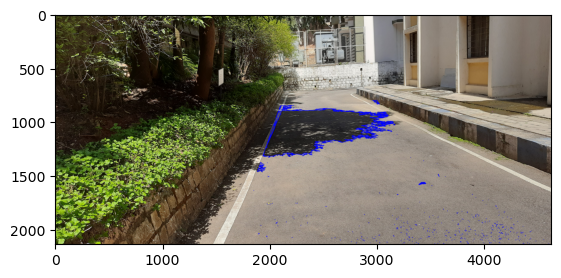

In [8]:
contours, hierarchy = cv2.findContours(masked_image,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Number of Contours found = " + str(len(contours)))
cv2.drawContours(img, contours, -1, (0, 0, 255), 3)
plt.imshow(img)

# SHADOW REMOVAL (manually)

# Method1

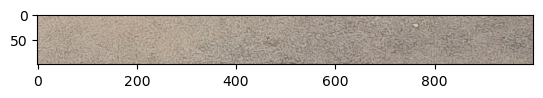

In [9]:
img =  cv2.imread('ShadowRemoval1.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
crop_img = img[1600:1700,2000:3000]
plt.imshow(crop_img) 

In [10]:
np.average(crop_img, axis = (0,1))

array([166.6102 , 154.46041, 142.33905])

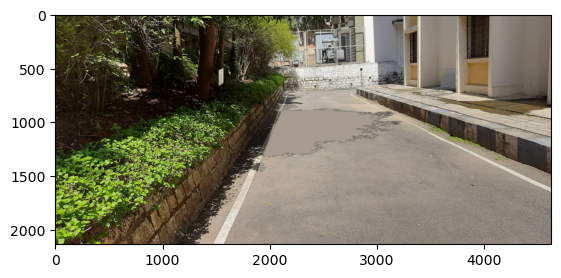

In [11]:
cv2.fillPoly(img, pts=contours, color=(166.6102 , 154.46041, 142.33905))
plt.imshow(img)

# Method2

In [12]:
img[2000,3000]

array([139, 131, 120], dtype=uint8)

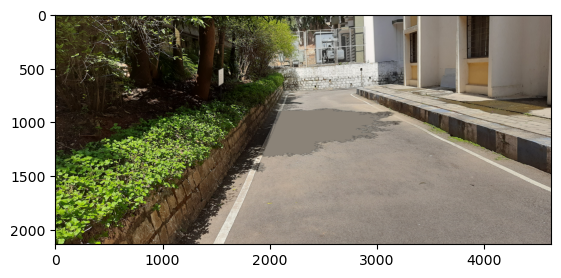

In [13]:
img = cv2.imread('ShadowRemoval1.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
cv2.fillPoly(img, pts=contours, color=(139, 131, 120))
plt.imshow(img)

# INPAINTING

# METHOD 1 USING cv2.INPAINT_TELEA

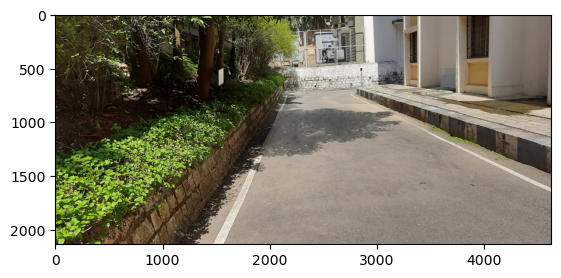

In [19]:
img = cv2.imread('ShadowRemoval1.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
op1 = cv2.inpaint(img,masked_image,50,cv2.INPAINT_TELEA)
plt.imshow(op1)

# METHOD 2 USING cv2.INPAINT_NS

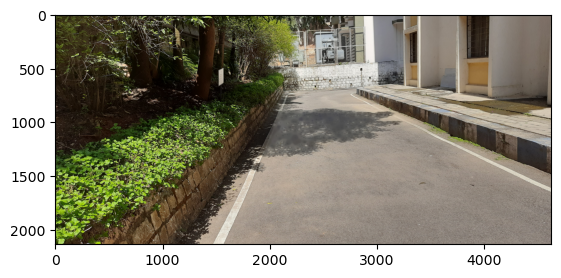

In [16]:
img = cv2.imread('ShadowRemoval1.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
op2 = cv2.inpaint(img, masked_image, 50, cv2.INPAINT_NS)
plt.imshow(op2)